In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nengo
from nengo import spa

from nengo_learn_assoc_mem.utils import make_alt_vocab

In [2]:
dimensions = 32
seed = 8

In [3]:
vocab, fan1, fan1_vecs, fan2, fan2_vecs, foil1, foil1_vecs, foil2, foil2_vecs = make_alt_vocab(5, 5, dimensions, seed, norm=True)
fan_vecs = np.concatenate((fan1_vecs, fan2_vecs))
foil_vecs = np.concatenate((foil1_vecs, foil2_vecs))

In [4]:
pca = PCA(n_components=3)

all_vecs = np.concatenate((fan_vecs, foil_vecs))

f_vecs_dict = {"fan1": fan1_vecs, "fan2": fan2_vecs, "foil1": foil1_vecs, "foil2": foil2_vecs}
p_vecs_dict = dict()

pca.fit(all_vecs)

for nm, vecs in f_vecs_dict.items():
    p_vecs_dict[nm] = pca.transform(vecs)

p_vecs = np.concatenate(list(p_vecs_dict.values()), axis=0)
print(p_vecs.shape)

(20, 3)


In [5]:
max_vec = np.max(p_vecs, axis=0)
min_vec = np.min(p_vecs, axis=0)
print(max_vec.shape)

(3,)


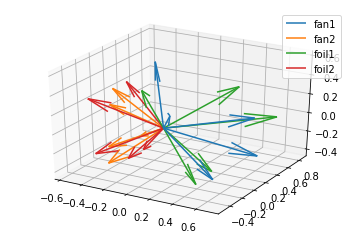

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s_i, (nm, vecs) in enumerate(p_vecs_dict.items()):
    soa = np.concatenate((np.zeros((vecs.shape[0], 3)), vecs), axis=1)
    X, Y, Z, U, V, W = zip(*soa)
    ax.quiver(X, Y, Z, U, V, W, color="C%s" % s_i, label=nm)

ax.set_xlim([min_vec[0], max_vec[0]])
ax.set_ylim([min_vec[1], max_vec[1]])
ax.set_zlim([min_vec[2], max_vec[2]])
plt.legend()

In [7]:
mean_fan1 = np.mean(fan1_vecs, axis=0)
mean_fan2 = np.mean(fan2_vecs, axis=0)

In [9]:
f1_vecs = np.array(fan1_vecs)
np.dot(f1_vecs, f1_vecs.T)

array([[ 1.        ,  0.03970747,  0.00439537,  0.11141629, -0.27093605],
       [ 0.03970747,  1.        , -0.35417119,  0.17365751,  0.16979251],
       [ 0.00439537, -0.35417119,  1.        , -0.29563689, -0.21718383],
       [ 0.11141629,  0.17365751, -0.29563689,  1.        ,  0.10417412],
       [-0.27093605,  0.16979251, -0.21718383,  0.10417412,  1.        ]])

In [10]:
print(np.linalg.norm(mean_fan1))
print(np.linalg.norm(mean_fan2))

0.3965062738542958
0.6962261191113335


In [13]:
fan1_space = []
for vec in fan1_vecs:
    fan1_space.append(np.dot(vec, mean_fan1))
print(np.mean(fan1_space))

0.3965062738542959


In [14]:
fan2_space = []
for vec in fan2_vecs:
    fan2_space.append(np.dot(vec, mean_fan2))
print(np.mean(fan2_space))

0.6962261191113335


# Now with more vectors

In [15]:
vocab, fan1, fan1_vecs, fan2, fan2_vecs, foil1, foil1_vecs, foil2, foil2_vecs = make_alt_vocab(16, 16, dimensions, seed, norm=True)
fan_vecs = np.concatenate((fan1_vecs, fan2_vecs))
foil_vecs = np.concatenate((foil1_vecs, foil2_vecs))

In [16]:
pca = PCA(n_components=3)

all_vecs = np.concatenate((fan_vecs, foil_vecs))

f_vecs_dict = {"fan1": fan1_vecs, "fan2": fan2_vecs, "foil1": foil1_vecs, "foil2": foil2_vecs}
p_vecs_dict = dict()

pca.fit(all_vecs)

for nm, vecs in f_vecs_dict.items():
    p_vecs_dict[nm] = pca.transform(vecs)

p_vecs = np.concatenate(list(p_vecs_dict.values()), axis=0)
print(p_vecs.shape)

(64, 3)


In [17]:
max_vec = np.max(p_vecs, axis=0)
min_vec = np.min(p_vecs, axis=0)
print(max_vec.shape)

(3,)


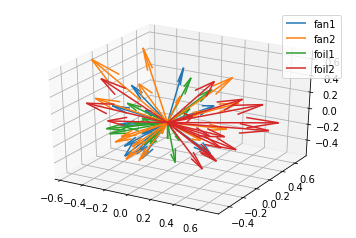

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s_i, (nm, vecs) in enumerate(p_vecs_dict.items()):
    soa = np.concatenate((np.zeros((vecs.shape[0], 3)), vecs), axis=1)
    X, Y, Z, U, V, W = zip(*soa)
    ax.quiver(X, Y, Z, U, V, W, color="C%s" % s_i, label=nm)

ax.set_xlim([min_vec[0], max_vec[0]])
ax.set_ylim([min_vec[1], max_vec[1]])
ax.set_zlim([min_vec[2], max_vec[2]])
plt.legend()

In [19]:
mean_fan1 = np.mean(fan1_vecs, axis=0)
mean_fan2 = np.mean(fan2_vecs, axis=0)

In [22]:
print(np.linalg.norm(mean_fan1))
print(np.linalg.norm(mean_fan2))

0.2362082653409139
0.31196539153462083
